# Exploration of the SVQTD dataset

In [1]:
import itertools

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Assessment of data validity

### Read data from provided csv files
Set feature column data types and also fix column name in test dataset

In [2]:
feature_cols = ["Chest", "Head", "Open", "Breathy", "Vibrato", "Front", "Back"]
dtypes_ = {i: int for i in feature_cols}

dev = pd.read_csv("../SVQTD/dev.csv", dtype=dtypes_)
seg_time_lists = pd.read_csv("../SVQTD/seg_time_lists.csv", dtype=dtypes_)
test = pd.read_csv("../SVQTD/test.csv", dtype=dtypes_ | {"Openess": int})
train = pd.read_csv("../SVQTD/train.csv", dtype=dtypes_)

# Fix column name in test
test.rename(columns={"Openess": "Open"}, inplace=True)

In [3]:
seg_time_lists

,name,num,time_start,time_end
0,test,0,0.000,0.000
1,0HVjTPqe5I0,0,8.893,17.323
2,0HVjTPqe5I0,1,18.053,28.832
3,0HVjTPqe5I0,2,39.120,53.974
4,0HVjTPqe5I0,3,56.265,64.498
...,...,...,...,...
7351,-kbi1EMcD3E,9,2.554,17.679
7352,-kbi1EMcD3E,10,18.072,30.581
7353,-kbi1EMcD3E,11,30.849,34.994
7354,-kbi1EMcD3E,12,35.098,156.263


In [4]:
datasets = {"dev": dev, "test": test, "train": train}
for key, data_ in datasets.items():
    print(key)
    display(data_)

dev


,Link,seg_num,Chest,Head,Open,Breathy,Vibrato,Front,Back,song
0,yp3Vi1CspgE,6,2,2,0,0,1,1,1,Vesti_la_giubba
1,QGrQgrHBzRw,3,2,1,0,1,0,0,0,Una_furtiva_lagrima
2,7K6YTjuqgBQ,2,3,2,0,0,1,0,0,Una_furtiva_lagrima
3,mONTSRzdRZw,9,3,3,0,0,1,0,0,Vesti_la_giubba
4,h8_AfrqbT5k,0,2,2,0,0,1,0,0,Una_furtiva_lagrima
...,...,...,...,...,...,...,...,...,...,...
874,7K6YTjuqgBQ,7,3,2,0,0,1,0,0,Una_furtiva_lagrima
875,1dfyre45UPE,15,3,2,0,0,1,0,0,Una_furtiva_lagrima
876,iyQyaIl2rfI,7,2,1,0,0,1,0,0,Una_furtiva_lagrima
877,7L6eCz54_d8,17,2,2,0,0,1,0,0,Una_furtiva_lagrima


test


,Link,seg_num,Head,Chest,Open,Breathy,Vibrato,Front,Back,song
0,tj--7L9MJTo,0,0,0,2,1,2,1,1,Una_furtiva_lagrima
1,zb7tCie8sFE,14,3,3,0,0,0,0,0,Una_furtiva_lagrima
2,230L9mf9BRY,0,2,2,0,0,1,0,0,Una_furtiva_lagrima
3,1VCAZQ9M22M,6,2,2,0,0,1,0,0,Una_furtiva_lagrima
4,1MFnSZ1GPMU,9,3,2,0,0,1,0,0,Una_furtiva_lagrima
...,...,...,...,...,...,...,...,...,...,...
874,vtdBBl0RkQo,1,1,1,1,0,0,0,0,Una_furtiva_lagrima
875,qOVjWb8xcYc,6,1,1,1,0,0,0,1,Una_furtiva_lagrima
876,pLaxGoUByTE,9,2,1,0,0,1,0,0,Vesti_la_giubba
877,qNPPPJu09lg,11,2,0,1,0,0,0,0,Una_furtiva_lagrima


train


,Link,seg_num,Head,Chest,Open,Breathy,Vibrato,Front,Back,song
0,wTyNiJ4bpbk,0,1,1,2,1,2,2,1,Che_gelida_manina
1,o3lWEBQevNo,0,1,2,0,1,1,0,0,Che_gelida_manina
2,y5eddiim6BQ,0,2,2,1,0,1,1,1,Che_gelida_manina
3,0QzJ86rMHzQ,0,2,1,0,0,1,0,0,Che_gelida_manina
4,xVilszbi-mU,0,1,2,3,0,1,0,0,Che_gelida_manina
...,...,...,...,...,...,...,...,...,...,...
2269,RFA_ilOtGCM&list=PLpEpmwpNk-6dBCxujxeIo9fZGZfx...,29,2,2,0,0,0,0,0,Nessun_Dorma
2270,RFA_ilOtGCM&list=PLpEpmwpNk-6dBCxujxeIo9fZGZfx...,30,1,1,0,0,0,0,0,Nessun_Dorma
2271,RFA_ilOtGCM&list=PLpEpmwpNk-6dBCxujxeIo9fZGZfx...,31,2,1,1,1,0,0,0,Nessun_Dorma
2272,RFA_ilOtGCM&list=PLpEpmwpNk-6dBCxujxeIo9fZGZfx...,32,2,2,0,0,0,0,0,Nessun_Dorma


### Check that same links do not appear across different datasets

In [5]:
for keys in itertools.combinations(datasets.keys(), 2):
    links = list(map(lambda key: set(datasets[key]["Link"].tolist()), keys))
    sets_are_disjoint = links[0].isdisjoint(links[1])
    print(f"{keys[0]} and {keys[1]} links are disjoint: {sets_are_disjoint}")
    if not sets_are_disjoint:
        common = links[0] & links[1]
        print(
            f"\t{len(common)} common links; {len(links[0])} distinct links in {keys[0]} and {len(links[1])} in {keys[1]}"
        )

dev and test links are disjoint: False
	100 common links; 100 distinct links in dev and 100 in test
dev and train links are disjoint: True
test and train links are disjoint: True


It quite much seems that `dev` and `test` are very much similar. That is not a problem per se, because `dev` set will not be used in training. Probably `dev` could be used as _test set in development phase_.

However, let's investigate further and see if the actual items are the same

In [6]:
pd.merge(
    left=dev,
    right=test,
    left_on=["Link", "seg_num"],
    right_on=["Link", "seg_num"],
    how="inner",
)

,Link,seg_num,Chest_x,Head_x,Open_x,Breathy_x,Vibrato_x,Front_x,Back_x,song_x,Head_y,Chest_y,Open_y,Breathy_y,Vibrato_y,Front_y,Back_y,song_y
0,wKF-6qtJqnY,12,2,2,0,0,2,2,1,Vesti_la_giubba,2,2,0,0,2,2,1,Vesti_la_giubba
1,wKF-6qtJqnY,6,2,2,0,0,1,2,1,Vesti_la_giubba,2,2,0,0,1,2,1,Vesti_la_giubba
2,wKF-6qtJqnY,11,2,2,2,0,1,1,1,Vesti_la_giubba,2,2,2,0,1,1,1,Vesti_la_giubba
3,wKF-6qtJqnY,7,2,3,2,0,1,2,2,Vesti_la_giubba,2,3,2,0,1,2,2,Vesti_la_giubba


It seems that there are only four shared items. In most cases, the segments are just divided between dev and test set.

### Check segments

See that `seg_time_lists` contains all link - segment combinations in `train`, `test` and `dev`.

In [7]:
data_segs = pd.concat(
    [dset[["Link", "seg_num"]].assign(origin=key) for key, dset in datasets.items()],
    axis=0,
)
seg_joined = pd.merge(
    left=data_segs,
    right=seg_time_lists,
    left_on=["Link", "seg_num"],
    right_on=["name", "num"],
    how="outer",
)

print("Items in datasets but not in seg_time_lists:")
display(seg_joined[seg_joined["name"].isna()])

print("Items in seg_time_lists but not in datasets:")
display(seg_joined[seg_joined["Link"].isna()])

Items in datasets but not in seg_time_lists:


,Link,seg_num,origin,name,num,time_start,time_end
98,1VCAZQ9M22M,10.0,dev,NaN,NaN,NaN,NaN
287,1VCAZQ9M22M,1.0,dev,NaN,NaN,NaN,NaN
640,1VCAZQ9M22M,3.0,dev,NaN,NaN,NaN,NaN
783,1VCAZQ9M22M,5.0,dev,NaN,NaN,NaN,NaN
825,1VCAZQ9M22M,15.0,dev,NaN,NaN,NaN,NaN
904,1VCAZQ9M22M,6.0,test,NaN,NaN,NaN,NaN
910,1VCAZQ9M22M,13.0,test,NaN,NaN,NaN,NaN
1014,1VCAZQ9M22M,2.0,test,NaN,NaN,NaN,NaN
1197,1VCAZQ9M22M,0.0,test,NaN,NaN,NaN,NaN
1329,1VCAZQ9M22M,8.0,test,NaN,NaN,NaN,NaN


Items in seg_time_lists but not in datasets:


,Link,seg_num,origin,name,num,time_start,time_end
4067,NaN,NaN,NaN,test,0.0,0.000,0.000
4068,NaN,NaN,NaN,0HVjTPqe5I0,0.0,8.893,17.323
4069,NaN,NaN,NaN,0HVjTPqe5I0,1.0,18.053,28.832
4070,NaN,NaN,NaN,0HVjTPqe5I0,2.0,39.120,53.974
4071,NaN,NaN,NaN,0HVjTPqe5I0,3.0,56.265,64.498
...,...,...,...,...,...,...,...
7395,NaN,NaN,NaN,z8tvfpd11Us,14.0,156.365,166.817
7396,NaN,NaN,NaN,z8tvfpd11Us,15.0,167.570,177.402
7397,NaN,NaN,NaN,z8tvfpd11Us,16.0,177.872,185.142
7398,NaN,NaN,NaN,z8tvfpd11Us,17.0,185.664,192.482


Apparently some clean-up in `test` and `dev` datasets is required: there is no segment data defined for one link.

### Segment time inconsistencies

If start time is greater than end time, the segment needs to be removed. It is not certain what to do with these.
Of course, the times could be reversed, but at this point let's just leave these out.

In [8]:
seg_time_lists[seg_time_lists["time_start"] > seg_time_lists["time_end"]]

,name,num,time_start,time_end
174,2GIi2nl2K8U,15,211.916,2.397
371,60JpvcZKLX4,3,71.955,4.909
486,8FFRrfUUChY,5,19.366,1.554
608,9_RaE13vf3o,7,22.607,0.519
699,gmATq9jlyRQ,6,38.468,0.314
832,jdlbVWHz_sc,6,22.678,21.039
899,l742nYExP0A,11,140.299,3.874
1044,oqYE-PuEttM,2,54.691,4.547
1064,p-2h6mqK0B8,2,58.266,4.516
1111,pLUrcyFcuhY,8,113.846,3.392


### Segments with identical time span

It seems that in the data, there are segments, whose time span is identical but segment numbers are increasing. Let's see to that.

In [9]:
dup_idx = seg_time_lists.duplicated(subset=["name", "time_start", "time_end"])
duplicates = seg_time_lists[dup_idx].sort_values(by=["name", "time_start"])
duplicates

,name,num,time_start,time_end
5182,-ERUOdqY8mM,12,0.0,26.148
5183,-ERUOdqY8mM,13,0.0,26.148
5184,-ERUOdqY8mM,14,0.0,26.148
5185,-ERUOdqY8mM,15,0.0,26.148
4876,-_eaoWuUxpc&list=PLcO-An1UmmHUsvUdLof5EgoVjXIm...,10,0.0,26.255
...,...,...,...,...
3476,zMAPmYl27OE,6,0.0,23.100
3477,zMAPmYl27OE,7,0.0,23.100
4859,zozCFoBwoD0&list=PLcO-An1UmmHUsvUdLof5EgoVjXIm...,5,0.0,25.053
4860,zozCFoBwoD0&list=PLcO-An1UmmHUsvUdLof5EgoVjXIm...,6,0.0,25.053


In [10]:
pd.merge(
    duplicates,
    pd.concat(
        [dset for dset in datasets.values()],
        axis=0,
    ).drop_duplicates(subset=["Link", "seg_num"]),
    left_on=["name", "num"],
    right_on=["Link", "seg_num"],
    how="left",
)

,name,num,time_start,time_end,Link,seg_num,Chest,Head,Open,Breathy,Vibrato,Front,Back,song
0,-ERUOdqY8mM,12,0.0,26.148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-ERUOdqY8mM,13,0.0,26.148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-ERUOdqY8mM,14,0.0,26.148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-ERUOdqY8mM,15,0.0,26.148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-_eaoWuUxpc&list=PLcO-An1UmmHUsvUdLof5EgoVjXIm...,10,0.0,26.255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,zMAPmYl27OE,6,0.0,23.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
310,zMAPmYl27OE,7,0.0,23.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
311,zozCFoBwoD0&list=PLcO-An1UmmHUsvUdLof5EgoVjXIm...,5,0.0,25.053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
312,zozCFoBwoD0&list=PLcO-An1UmmHUsvUdLof5EgoVjXIm...,6,0.0,25.053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It seems that there is no content attached to these segments, though. It is not useful to download these items.

## Data content

Here, we will use filtered and cleaned data, as produced by DVC pipeline ETL stage.

### Segment lengths

<AxesSubplot: title={'center': 'Whole dataset'}, xlabel='Audio segment length, s', ylabel='Frequency'>

<AxesSubplot: title={'center': 'Clips with length < 50 s'}, xlabel='Audio segment length, s', ylabel='Frequency'>

minimum: 0.171 s


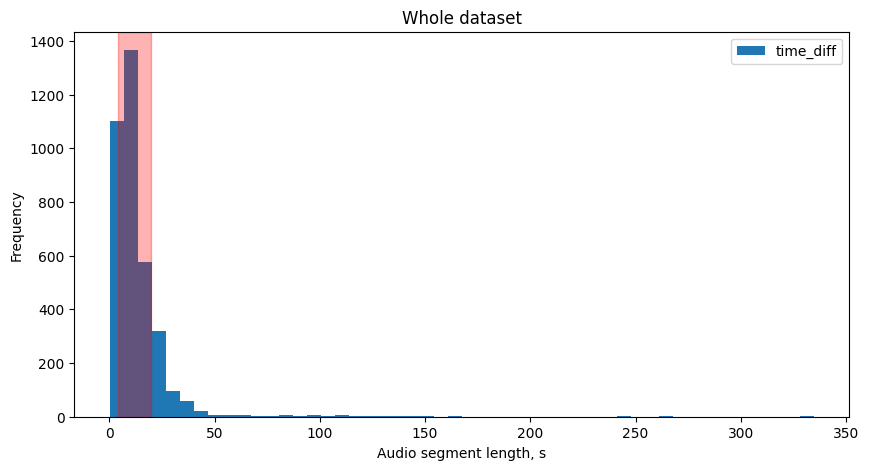

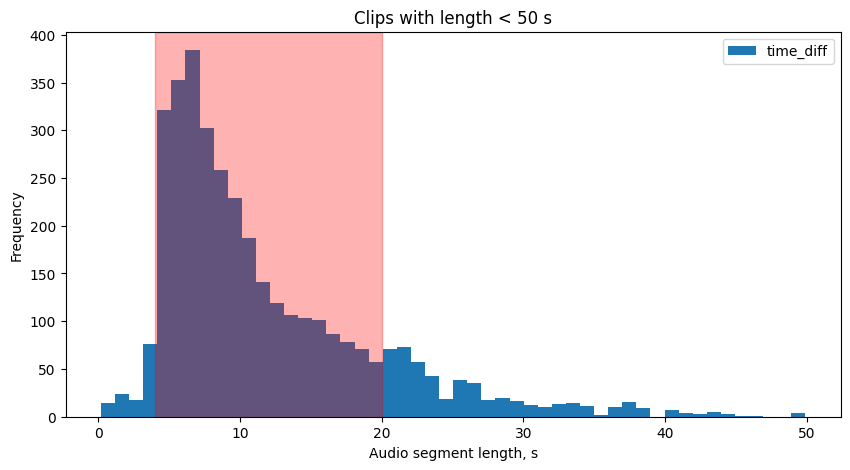

In [11]:
segments = pd.read_parquet("../data/segments_filter.parquet")
segments["time_diff"] = segments.time_end - segments.time_start

ax = segments[["time_diff"]].plot.hist(bins=50, figsize=(10, 5))
ax.set_xlabel("Audio segment length, s")
ax.set_title("Whole dataset")
ax.axvspan(4, 20, color="red", alpha=0.3)

display(ax)

ax = segments[segments["time_diff"] < 50.0][["time_diff"]].plot.hist(
    bins=50, figsize=(10, 5)
)
ax.set_xlabel("Audio segment length, s")
ax.set_title("Clips with length < 50 s")
ax.axvspan(4, 20, color="red", alpha=0.3)

display(ax)

print(f"minimum: {segments['time_diff'].min():.3f} s")

In dataset description, it is stated that the segments are 4 to 20 seconds long. How many of the segments are in that range?

In [12]:
quantile_4s = np.mean(segments["time_diff"].to_numpy() < 4.0)
quantile_20s = np.mean(segments["time_diff"].to_numpy() <= 20.0)
print(f"{(quantile_20s - quantile_4s)*100:.1f} % of samples are in range 4 s to 20 s")
print(f"- {quantile_4s*100:.1f} % are shorter than 4 s")
print(f"- {(1 - quantile_20s)*100:.1f} % are longer than 20 s")

81.8 % of samples are in range 4 s to 20 s
- 2.1 % are shorter than 4 s
- 16.1 % are longer than 20 s


In [13]:
print(f"Total audio length in segments: {segments['time_diff'].sum() / 3600:.2f} hours")

Total audio length in segments: 13.44 hours


### Target values

Let's have a look at the distribution of target values

In [14]:
train = pd.read_parquet("../data/train_filter.parquet")
dev = pd.read_parquet("../data/dev_filter.parquet")
test = pd.read_parquet("../data/test_filter.parquet")

all_data = pd.concat(
    [
        train.assign(dataset="train"),
        dev.assign(dataset="dev"),
        test.assign(dataset="test"),
    ],
    axis=0,
    ignore_index=True,
)

all_data.describe()

,seg_num,Head,Chest,Open,Breathy,Vibrato,Front,Back
count,3607.0,3607.0,3607.0,3607.0,3607.0,3607.0,3607.0,3607.0
mean,9.324369,1.857777,1.856668,0.431106,0.120044,0.758248,0.252287,0.245356
std,7.159975,0.728936,0.690016,0.716773,0.325058,0.498804,0.579847,0.50671
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
50%,8.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0
75%,13.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0
max,45.0,3.0,3.0,3.0,1.0,2.0,2.0,2.0


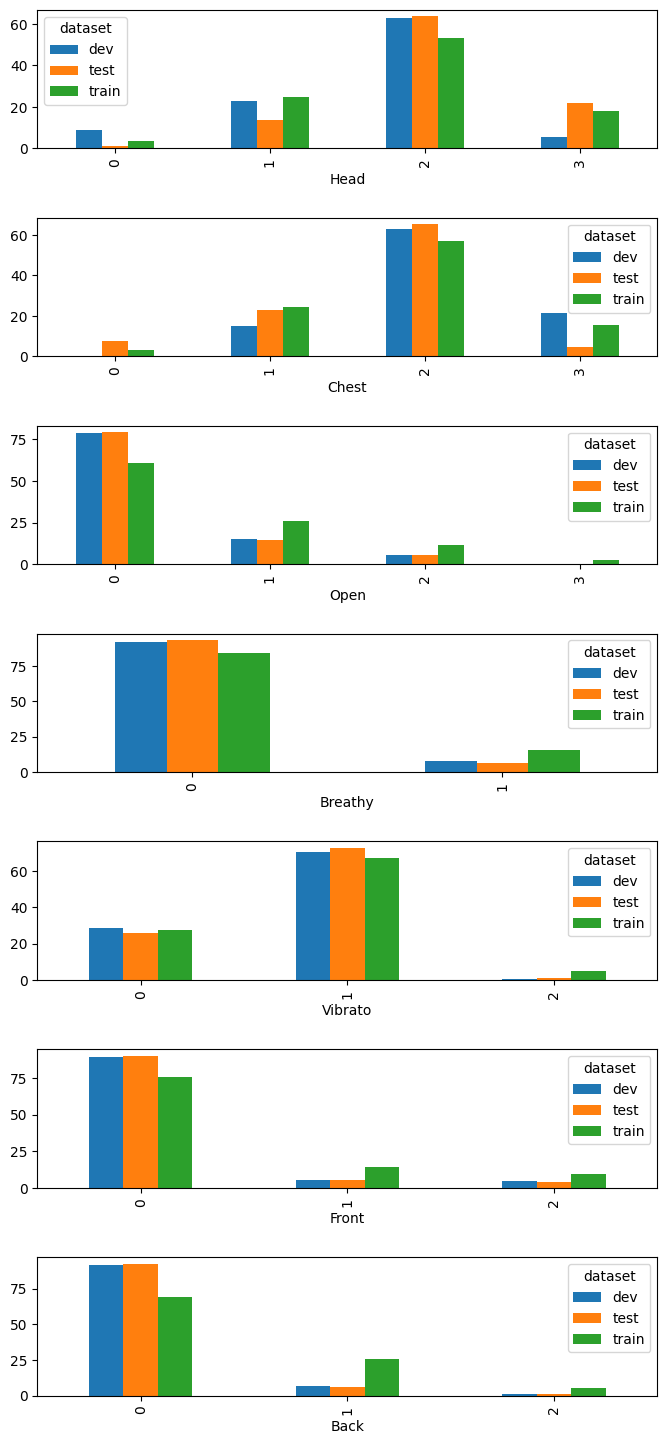

In [15]:
col_names = ["Head", "Chest", "Open", "Breathy", "Vibrato", "Front", "Back"]


def col_summary(col: str):
    return (
        all_data.groupby(["dataset", col])
        .size()
        .to_frame()
        .rename(columns={0: "count"})
        .assign(
            set_total=lambda df: df.groupby("dataset").transform("sum"),
            share=lambda df: (df["count"] / df["set_total"]) * 100.0,
        )
        .drop(columns=["count", "set_total"])
        .pivot_table(index=col, values="share", columns="dataset")
    )


fig, axes = plt.subplots(len(col_names), figsize=(8, 18))
fig.subplots_adjust(hspace=0.5)
for i, col in enumerate(col_names):
    col_summary(col).plot.bar(ax=axes[i])

It seems that the datasets are quite well in balance, with regards to target value distribution.

### Target value correlation

In [16]:
corr_mat = all_data[col_names].corr()
corr_mat

,Head,Chest,Open,Breathy,Vibrato,Front,Back
Head,1.000000,0.444646,-0.057239,-0.143274,0.041172,0.018649,0.012664
Chest,0.444646,1.000000,-0.113889,-0.326328,0.247368,0.032876,0.079195
Open,-0.057239,-0.113889,1.000000,0.386029,0.006922,0.232661,0.276762
Breathy,-0.143274,-0.326328,0.386029,1.000000,-0.260522,0.068797,0.014750
Vibrato,0.041172,0.247368,0.006922,-0.260522,1.000000,0.154363,0.232552
Front,0.018649,0.032876,0.232661,0.068797,0.154363,1.000000,0.396156
Back,0.012664,0.079195,0.276762,0.014750,0.232552,0.396156,1.000000


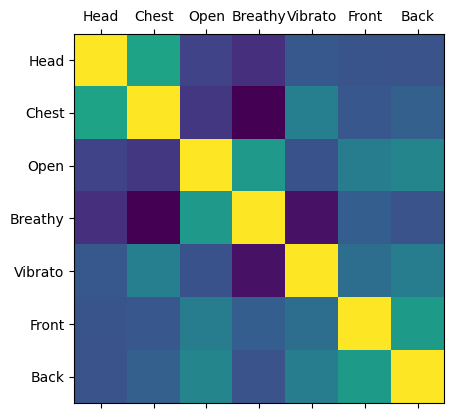

In [17]:
fig, ax = plt.subplots(1)
ax.matshow(corr_mat)
ax.set_xticks(list(range(len(col_names))))
ax.set_xticklabels(col_names)
ax.set_yticks(list(range(len(col_names))))
ax.set_yticklabels(col_names);

In [18]:
corr_mat.unstack().sort_values(ascending=False).drop_duplicates()

Head     Head       1.000000
Chest    Head       0.444646
Back     Front      0.396156
Breathy  Open       0.386029
Back     Open       0.276762
Vibrato  Chest      0.247368
Front    Open       0.232661
Back     Vibrato    0.232552
Front    Vibrato    0.154363
Back     Chest      0.079195
Front    Breathy    0.068797
Head     Vibrato    0.041172
Chest    Front      0.032876
Head     Front      0.018649
Back     Breathy    0.014750
         Head       0.012664
Vibrato  Open       0.006922
Head     Open      -0.057239
Open     Chest     -0.113889
Head     Breathy   -0.143274
Vibrato  Breathy   -0.260522
Breathy  Chest     -0.326328
dtype: float64